In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
rc('font', family='serif')
import urllib
import re

In [2]:
# Top rated TV series:
top100 = 'https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250'
    
print('Requesting the page:',top100,'...')
req = urllib.request.Request(top100, headers={'User-Agent' : "Magic Browser"}) 
con = urllib.request.urlopen( req )
html = con.read()
'...done.'

Requesting the page: https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250 ...


'...done.'

In [3]:
series_title = []
series_pos = []
series_rating = []
series_votes = []
series_id =[]
temp = html.split(b'Top Rated TV Shows')[6]
table=temp.split(b'\n')
for i, line in enumerate(table):
    if line.startswith(b'title='):
        series_title.append(re.findall(r'>(.*)<', line.decode('utf-8'))[0])
    elif line.startswith(b'    <span name="rk" data-value'):
        series_pos.append(int(re.findall(r'\d+\.?\d*', line.decode('utf-8'))[0]))
        series_rating.append(re.findall(r'\d+\.?\d*', table[i+1].decode('utf-8'))[0])
        series_votes.append(int(re.findall(r'\d+\.?\d*', table[i+3].decode('utf-8'))[0]))
    elif line.startswith(b'<a href="/title/'):
        series_id.append(re.findall(r'tt\d+', line.decode('utf-8'))[0])

series_df = pd.DataFrame(series_title, columns=['Title'])
series_df['position'] = series_pos
series_df['rating'] = series_rating
series_df['votes'] = series_votes
series_df['id'] = series_id
print(series_df.shape)
series_df.head()

(250, 5)


,Title,position,rating,votes,id
0,Planeta Ziemia II,1,9.50990762421431,48996,tt5491994
1,Kompania braci,2,9.46709486442189,284331,tt0185906
2,Planeta Ziemia,3,9.454218842131525,130974,tt0795176
3,Gra o tron,4,9.44601611283063,1305488,tt0944947
4,Breaking Bad,5,9.416097280503987,1074779,tt0903747


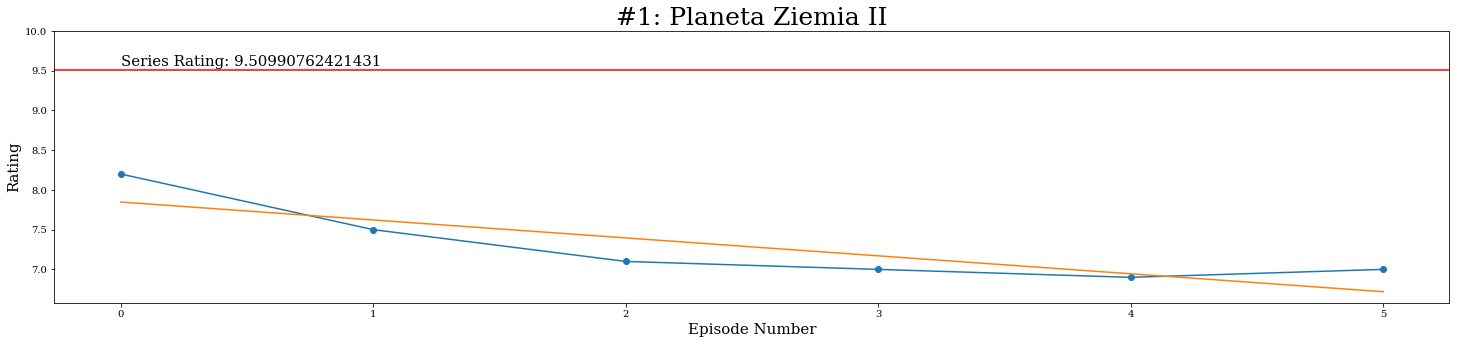

Series rating: 9.50990762421431
Series votes: 48996
Average rating over all seasons: 7.283333333333332
Average votes over all seasons: 1985.3333333333333


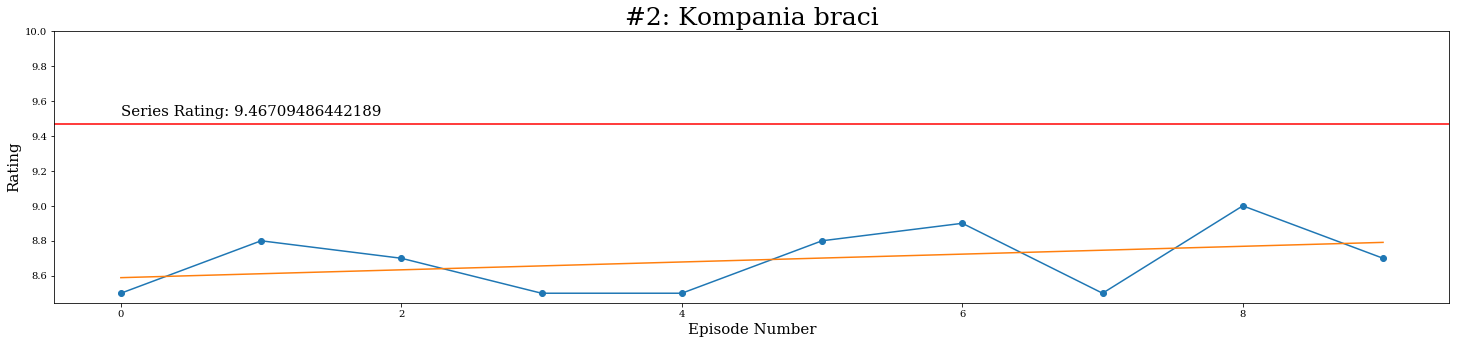

Series rating: 9.46709486442189
Series votes: 284331
Average rating over all seasons: 8.69
Average votes over all seasons: 3816.7


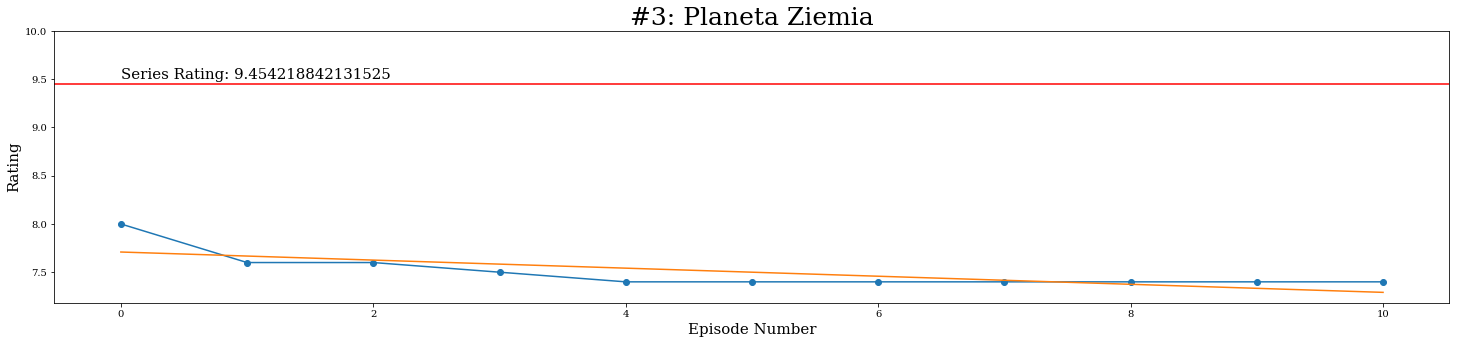

Series rating: 9.454218842131525
Series votes: 130974
Average rating over all seasons: 7.500000000000001
Average votes over all seasons: 2030.2727272727273


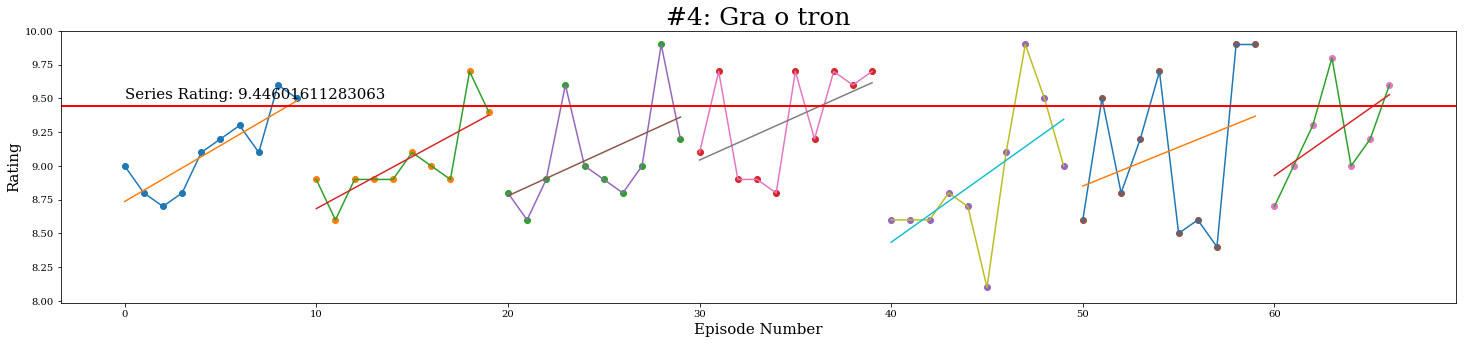

Series rating: 9.44601611283063
Series votes: 1305488
Average rating over all seasons: 9.109795918367347
Average votes over all seasons: 27624.379591836736


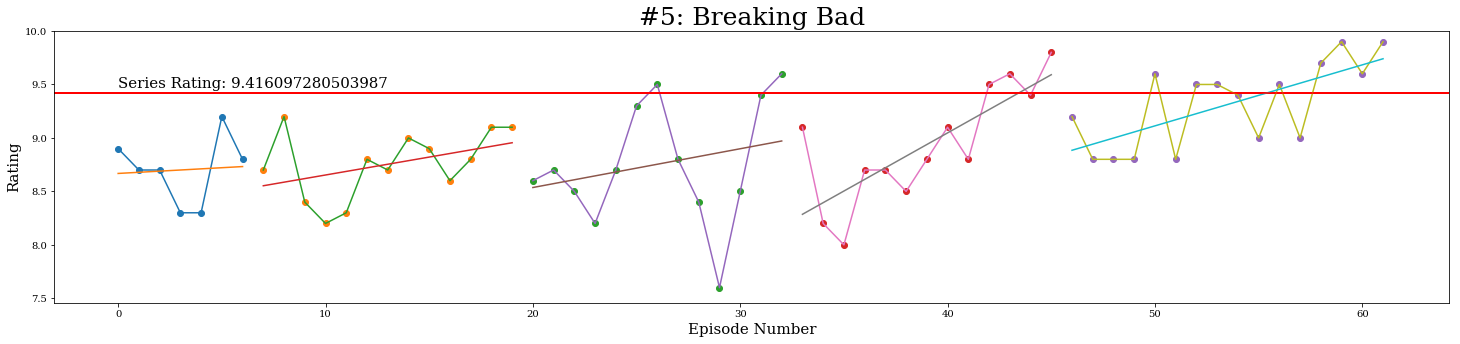

Series rating: 9.416097280503987
Series votes: 1074779
Average rating over all seasons: 8.891730769230769
Average votes over all seasons: 13436.680769230768


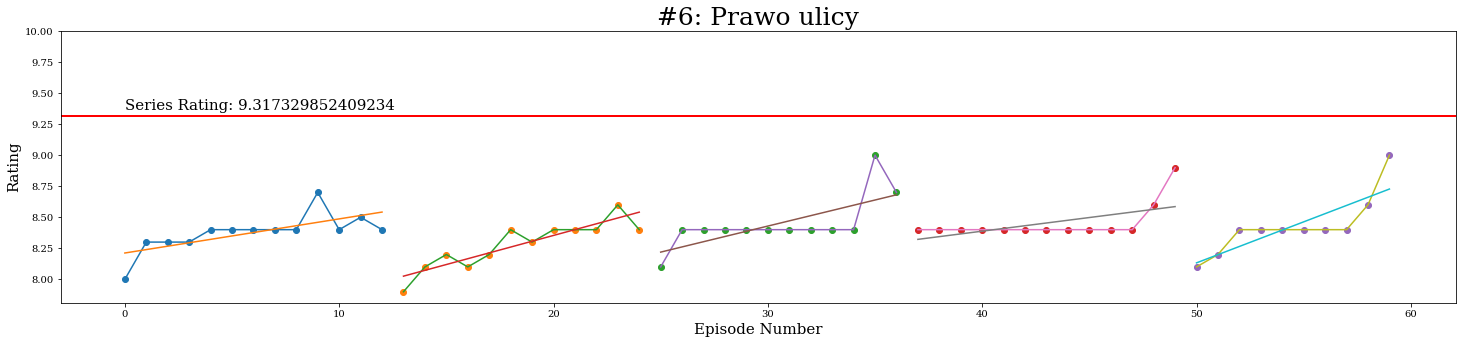

Series rating: 9.317329852409234
Series votes: 223635
Average rating over all seasons: 8.398820512820516
Average votes over all seasons: 1984.3056410256409


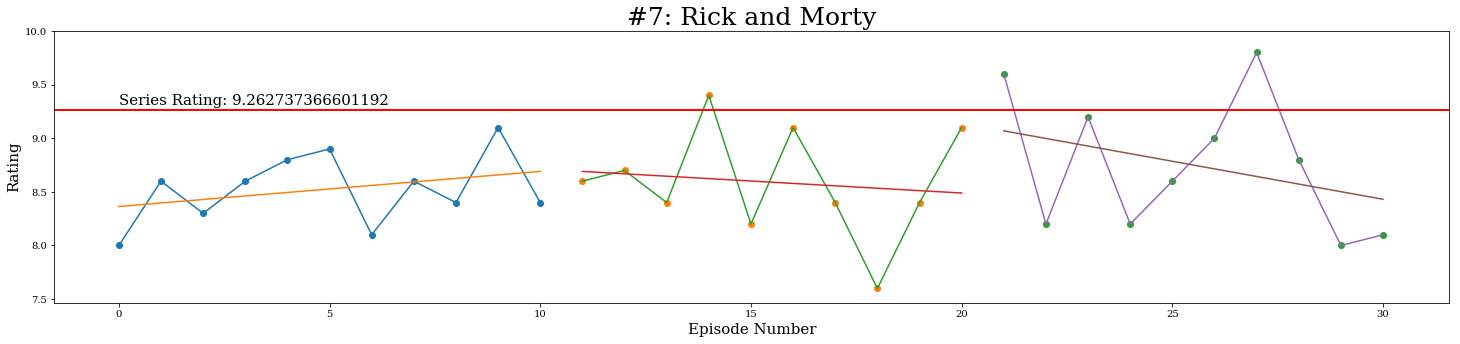

Series rating: 9.262737366601192
Series votes: 204188
Average rating over all seasons: 8.622424242424243
Average votes over all seasons: 6442.336363636364


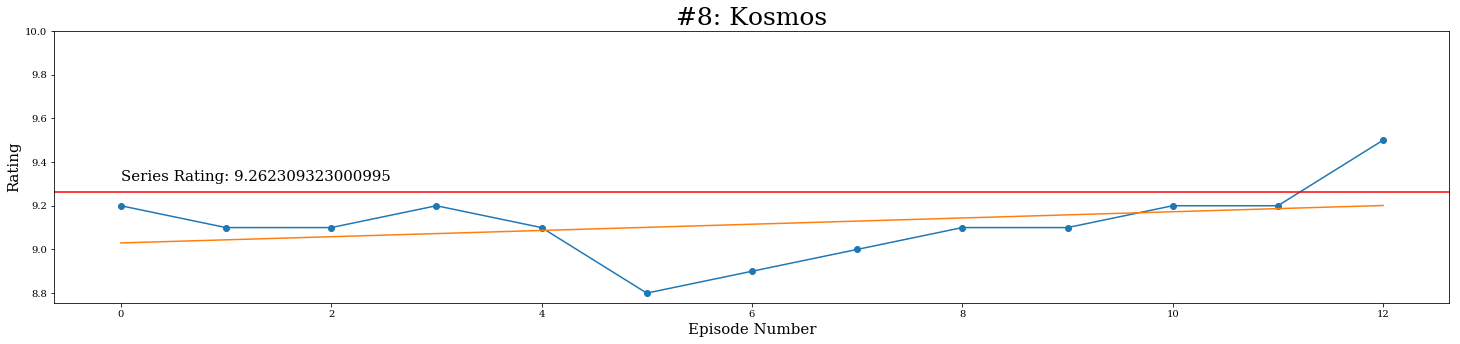

Series rating: 9.262309323000995
Series votes: 82863
Average rating over all seasons: 9.115384615384615
Average votes over all seasons: 1288.8461538461538


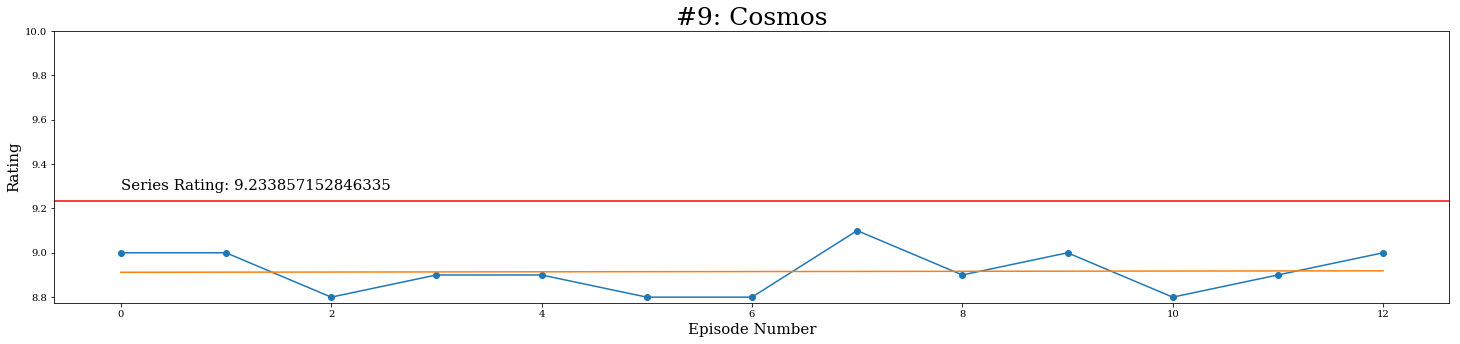

Series rating: 9.233857152846335
Series votes: 27509
Average rating over all seasons: 8.915384615384616
Average votes over all seasons: 277.2307692307692


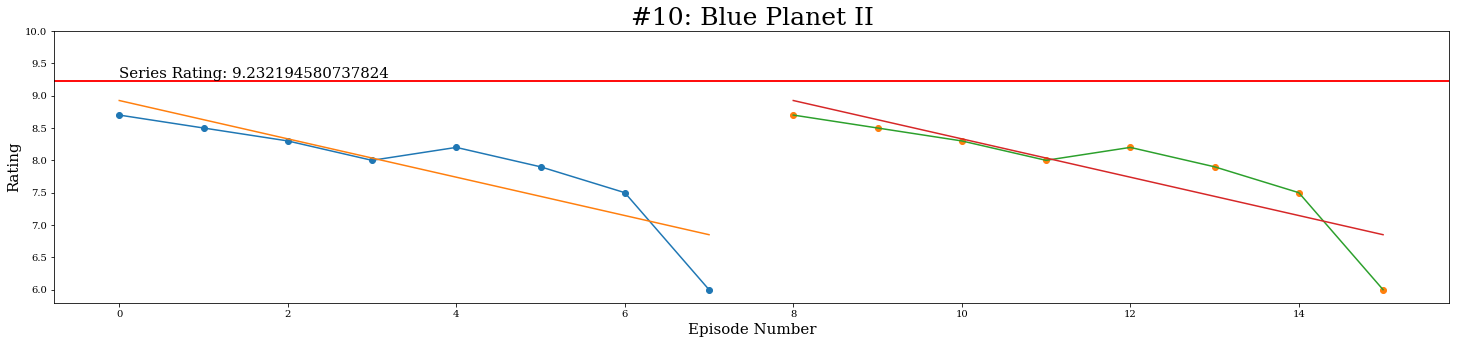

Series rating: 9.232194580737824
Series votes: 6321
Average rating over all seasons: 7.8875
Average votes over all seasons: 349.25


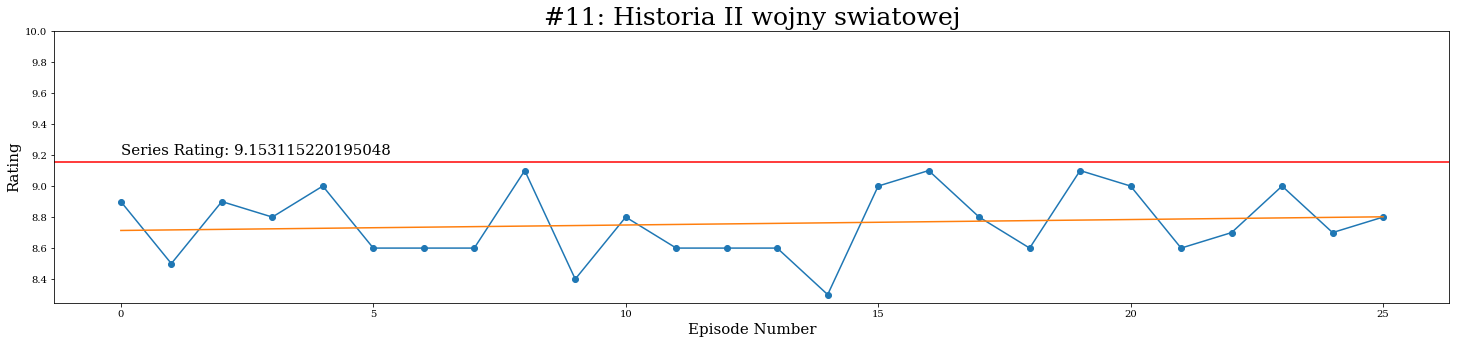

Series rating: 9.153115220195048
Series votes: 15690
Average rating over all seasons: 8.757692307692306
Average votes over all seasons: 173.80769230769232


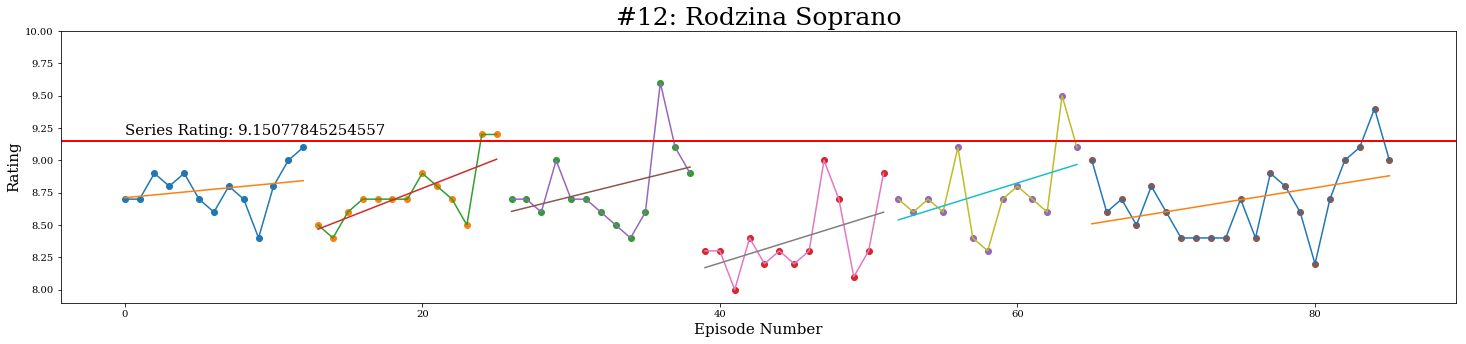

Series rating: 9.15077845254557
Series votes: 225604
Average rating over all seasons: 8.687667887667887
Average votes over all seasons: 2001.915750915751


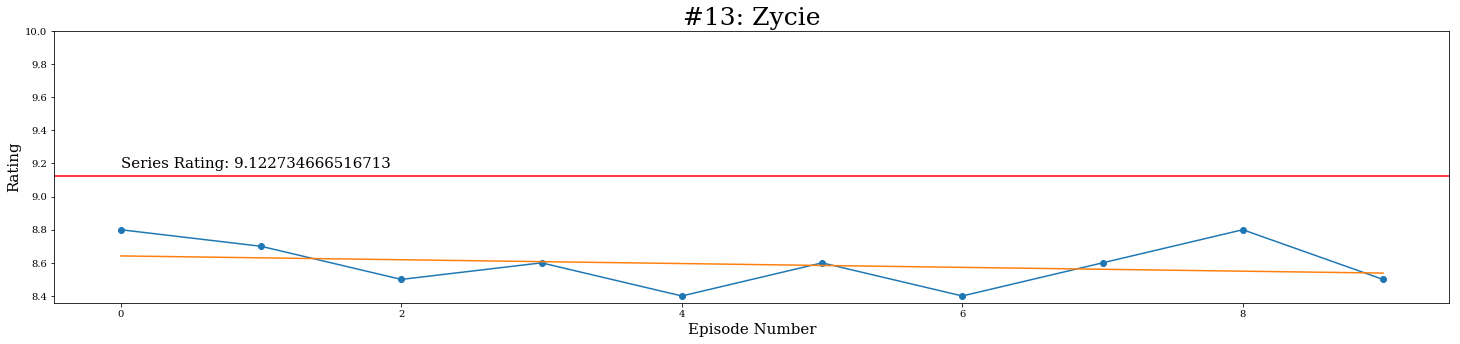

Series rating: 9.122734666516713
Series votes: 30353
Average rating over all seasons: 8.59
Average votes over all seasons: 349.8


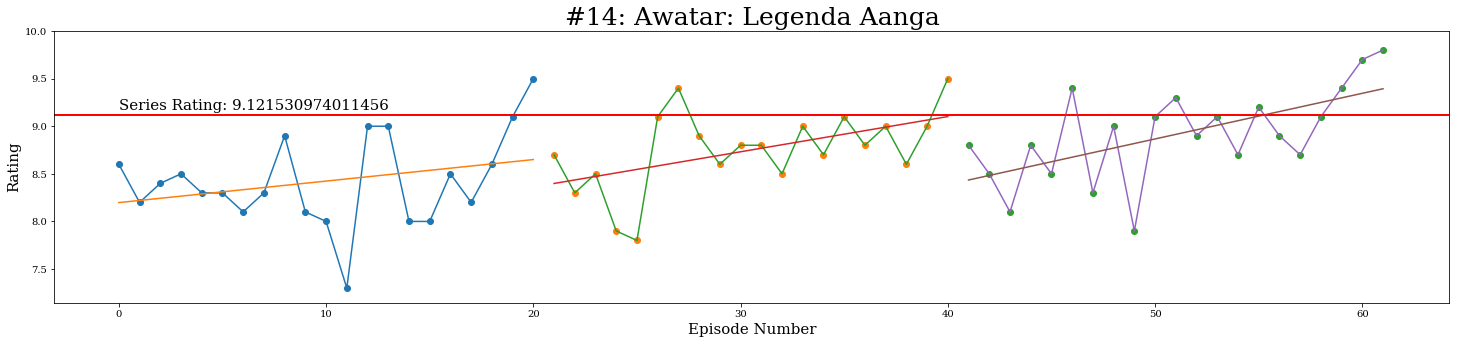

Series rating: 9.121530974011456
Series votes: 164595
Average rating over all seasons: 8.696031746031746
Average votes over all seasons: 1136.3055555555557


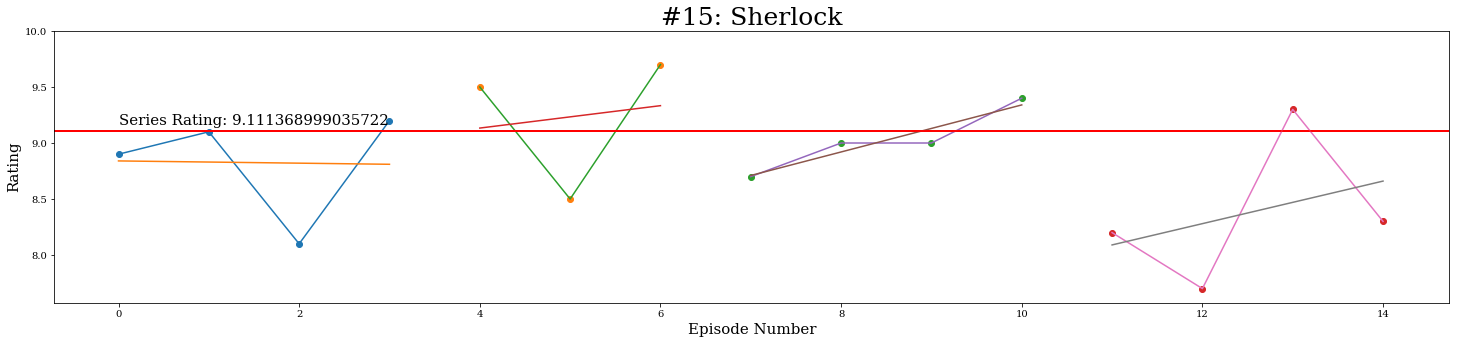

Series rating: 9.111368999035722
Series votes: 634188
Average rating over all seasons: 8.864583333333332
Average votes over all seasons: 21351.125


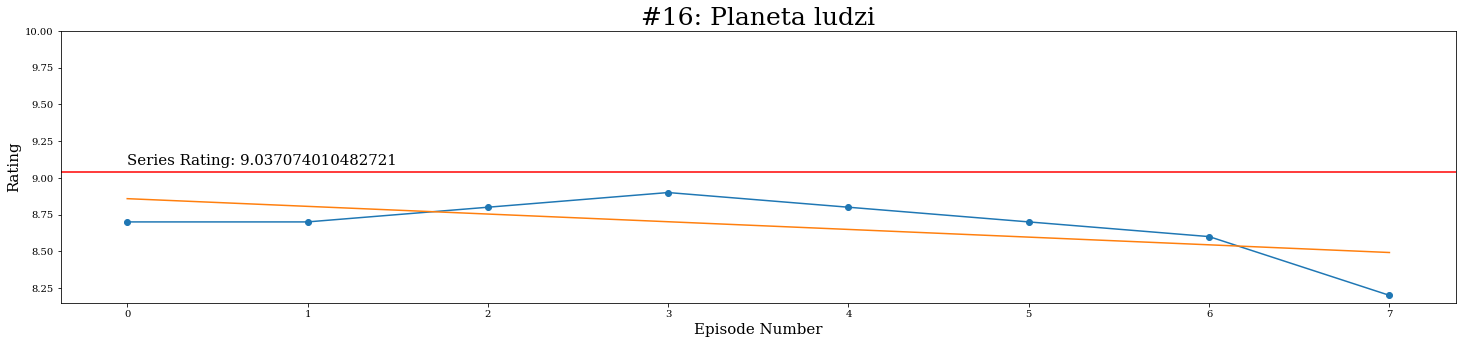

Series rating: 9.037074010482721
Series votes: 17841
Average rating over all seasons: 8.675
Average votes over all seasons: 244.0


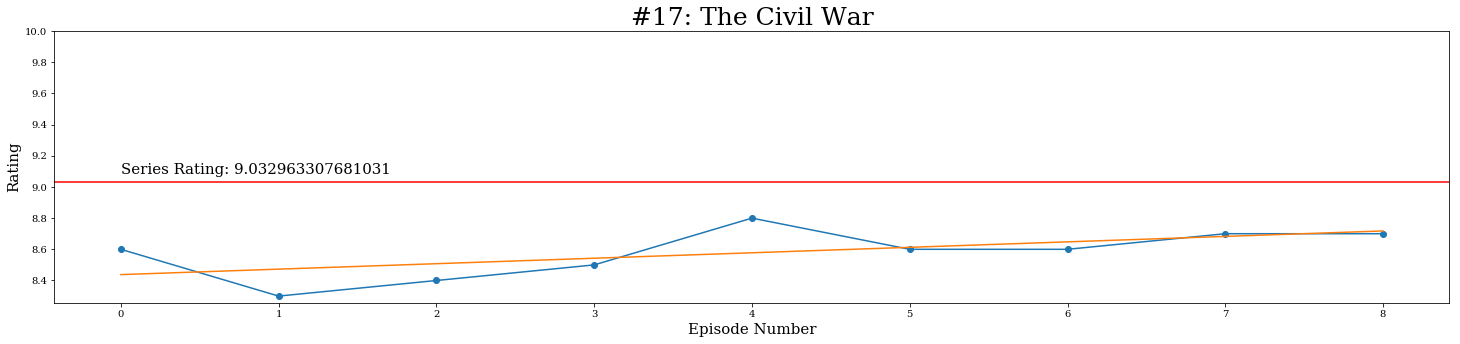

Series rating: 9.032963307681031
Series votes: 8755
Average rating over all seasons: 8.577777777777778
Average votes over all seasons: 163.0


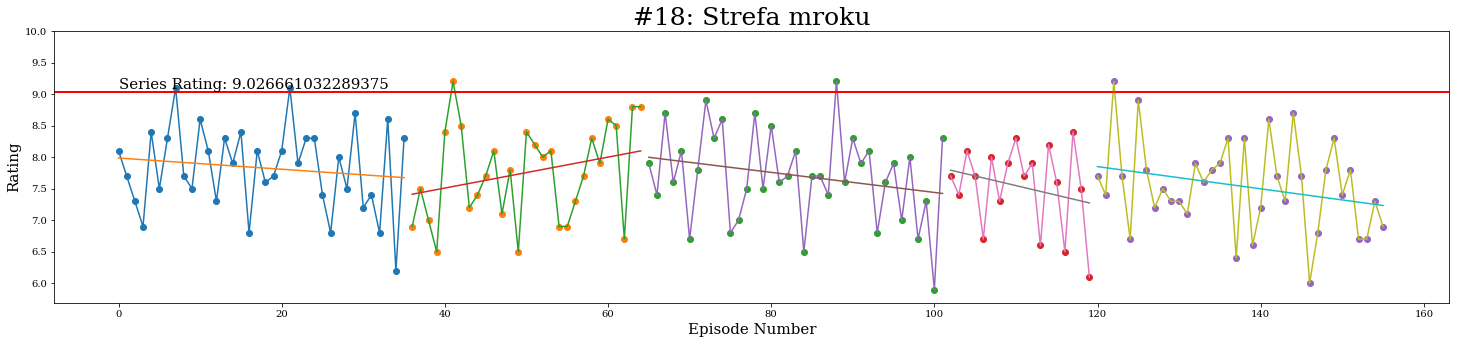

Series rating: 9.026661032289375
Series votes: 53600
Average rating over all seasons: 7.674307756031894
Average votes over all seasons: 1235.085885885886


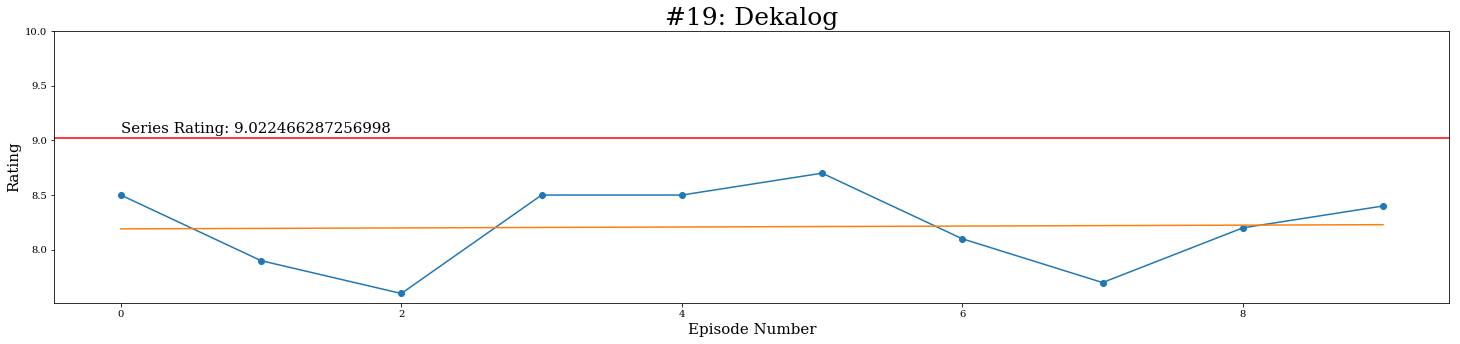

Series rating: 9.022466287256998
Series votes: 16097
Average rating over all seasons: 8.21
Average votes over all seasons: 3012.4


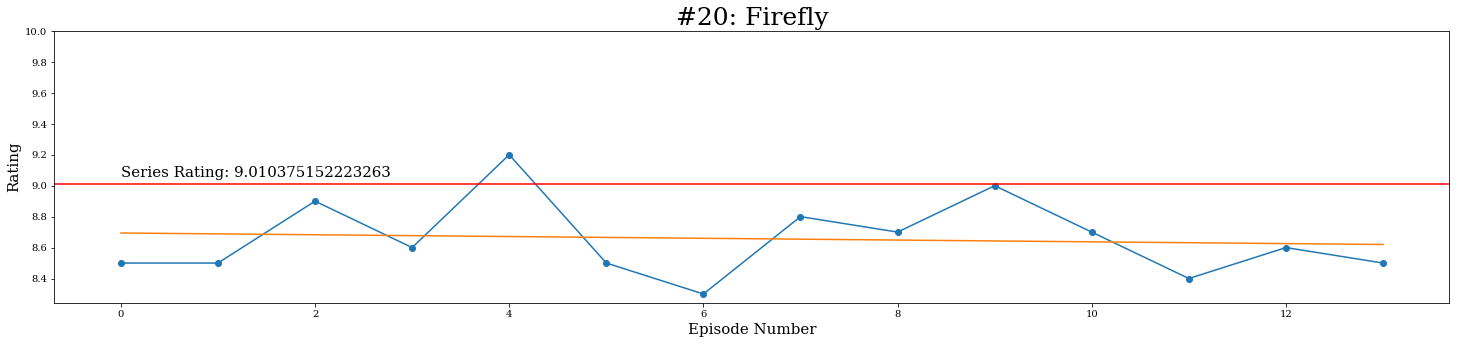

Series rating: 9.010375152223263
Series votes: 211822
Average rating over all seasons: 8.657142857142857
Average votes over all seasons: 3366.5714285714284


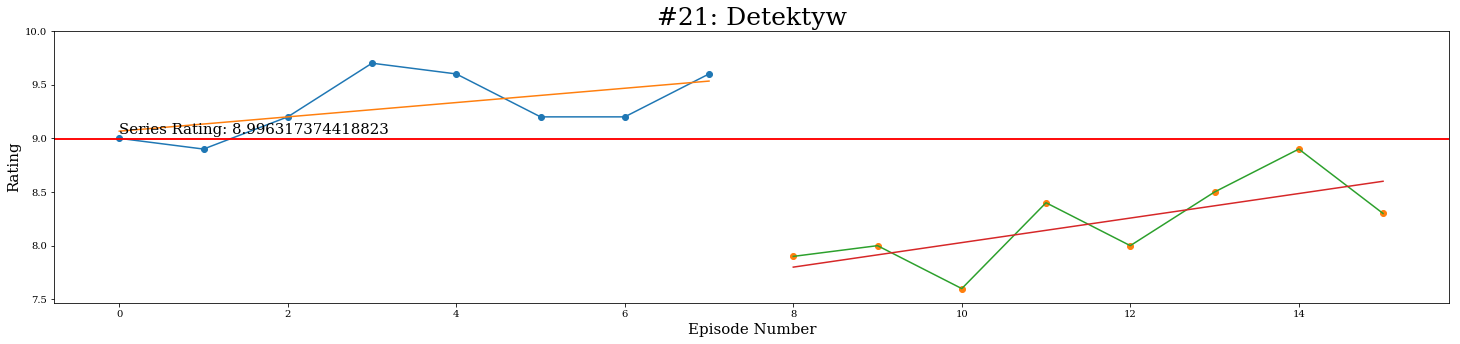

Series rating: 8.996317374418823
Series votes: 393768
Average rating over all seasons: 8.75
Average votes over all seasons: 9692.875


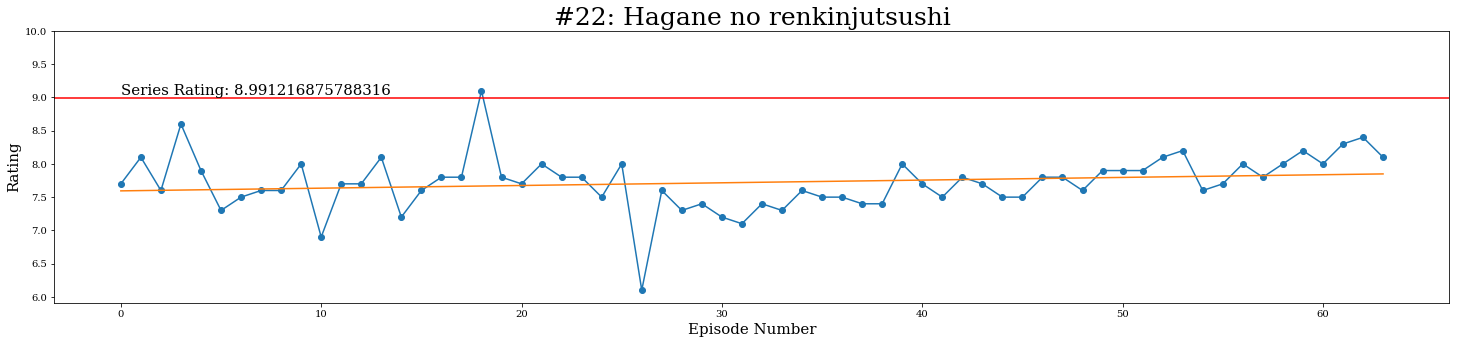

Series rating: 8.991216875788316
Series votes: 72113
Average rating over all seasons: 7.721875
Average votes over all seasons: 322.171875


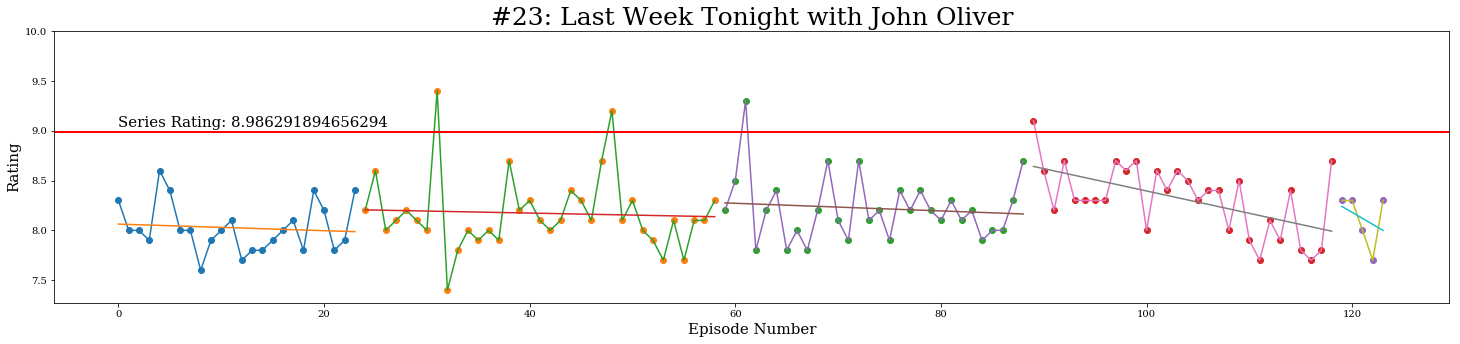

Series rating: 8.986291894656294
Series votes: 57399
Average rating over all seasons: 8.170619047619047
Average votes over all seasons: 213.76214285714286


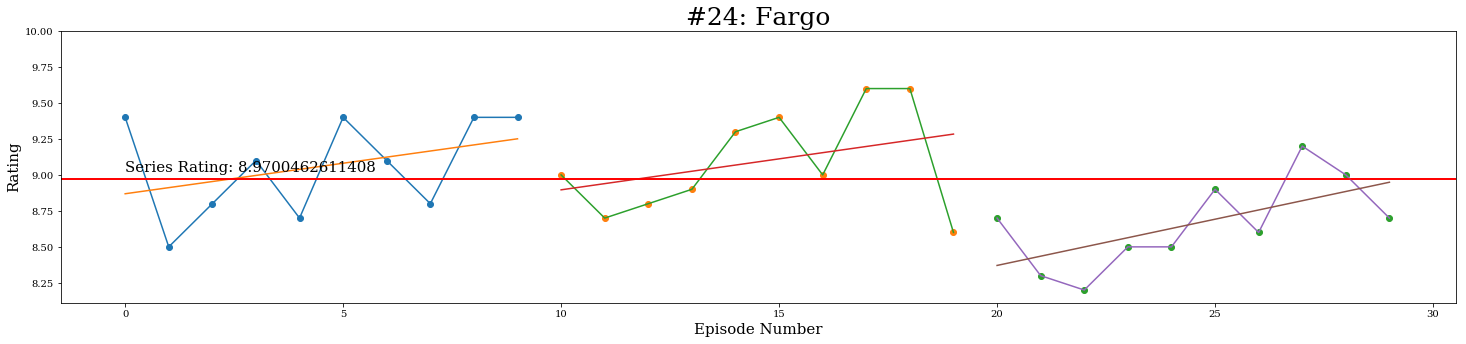

Series rating: 8.9700462611408
Series votes: 237745
Average rating over all seasons: 8.936666666666666
Average votes over all seasons: 4568.099999999999


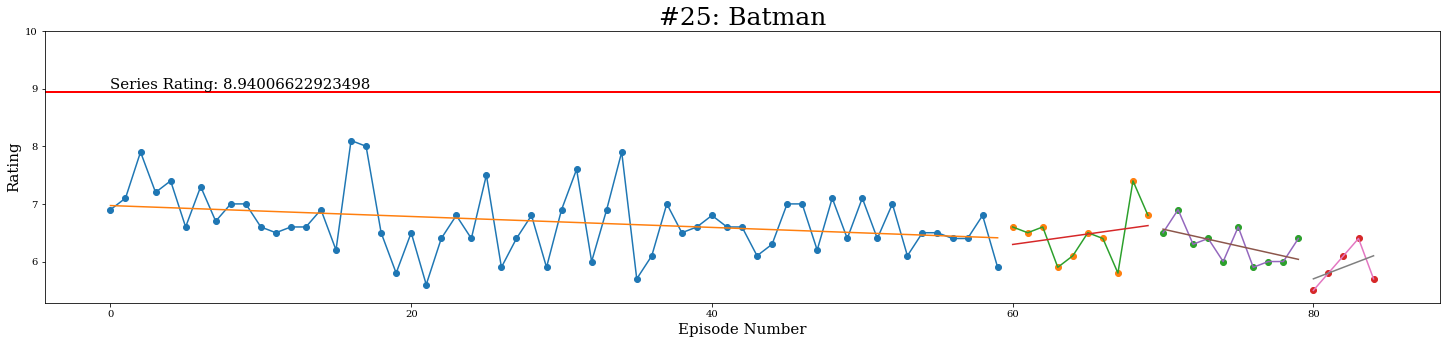

Series rating: 8.94006622923498
Series votes: 65771
Average rating over all seasons: 6.337916666666667
Average votes over all seasons: 696.8499999999999


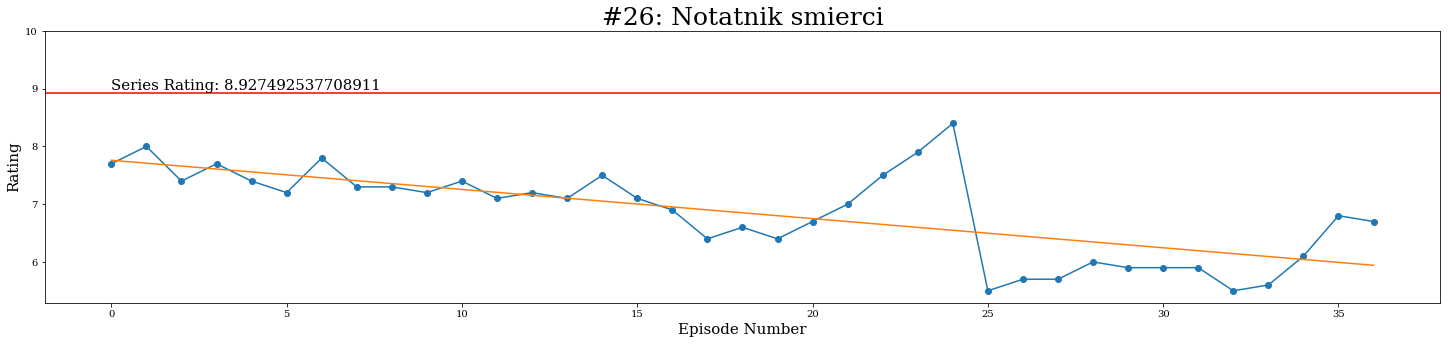

Series rating: 8.927492537708911
Series votes: 155164
Average rating over all seasons: 6.851351351351351
Average votes over all seasons: 1257.5945945945946


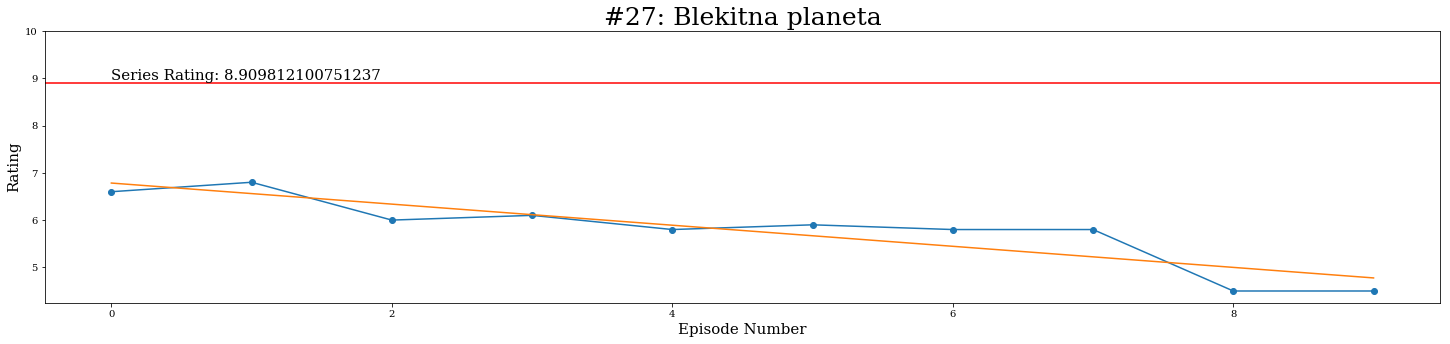

Series rating: 8.909812100751237
Series votes: 20717
Average rating over all seasons: 5.779999999999999
Average votes over all seasons: 380.7


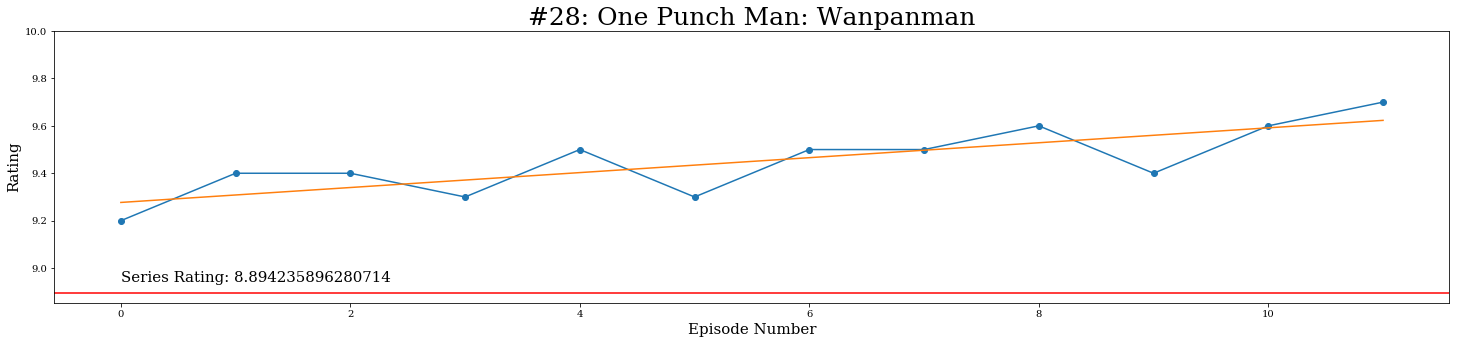

Series rating: 8.894235896280714
Series votes: 60261
Average rating over all seasons: 9.45
Average votes over all seasons: 1781.25


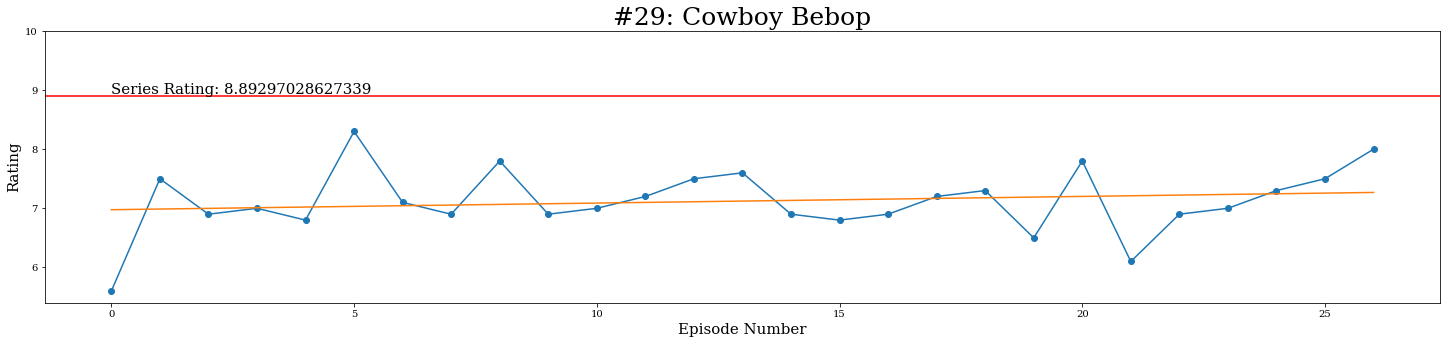

Series rating: 8.89297028627339
Series votes: 65713
Average rating over all seasons: 7.122222222222224
Average votes over all seasons: 731.0370370370371


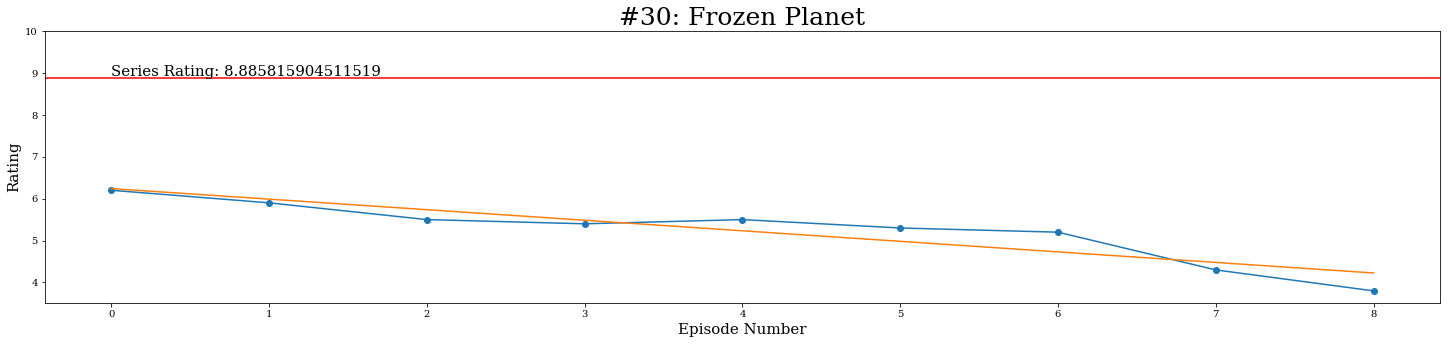

Series rating: 8.885815904511519
Series votes: 17740
Average rating over all seasons: 5.2333333333333325
Average votes over all seasons: 395.22222222222223


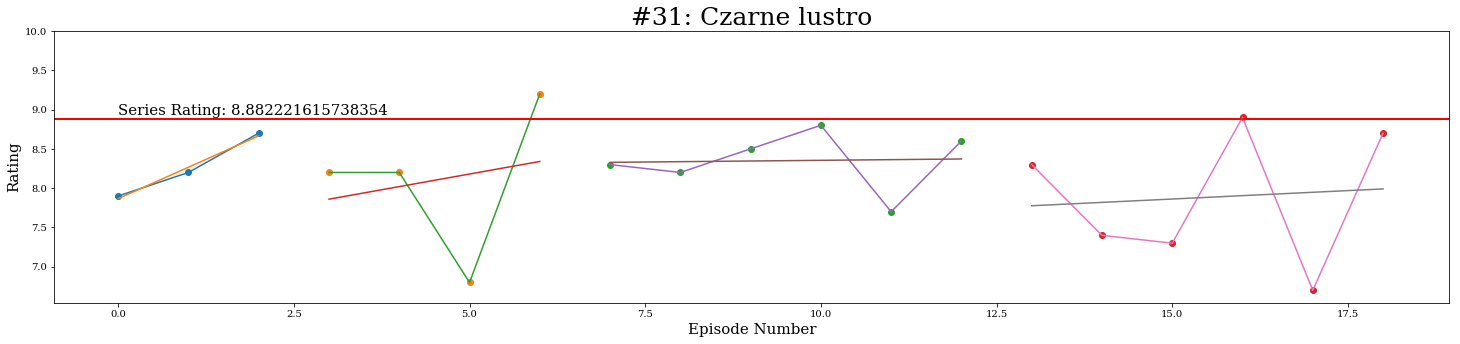

Series rating: 8.882221615738354
Series votes: 215271
Average rating over all seasons: 8.15
Average votes over all seasons: 23902.0


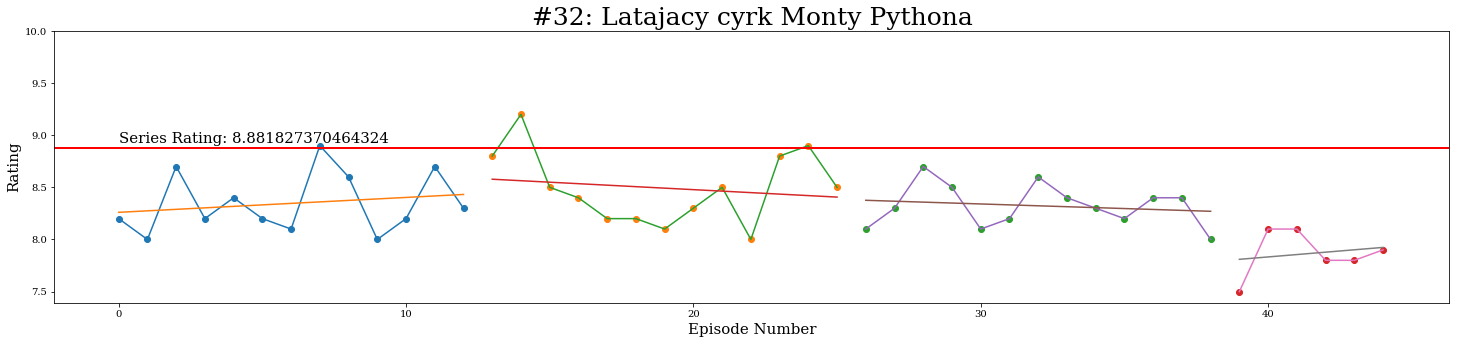

Series rating: 8.881827370464324
Series votes: 52596
Average rating over all seasons: 8.257051282051282
Average votes over all seasons: 302.0512820512821


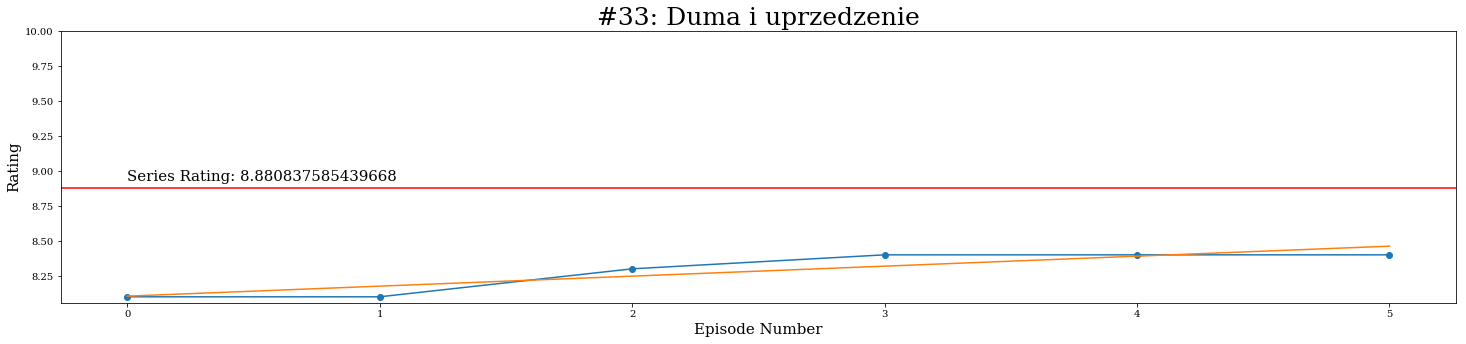

Series rating: 8.880837585439668
Series votes: 61943
Average rating over all seasons: 8.283333333333333
Average votes over all seasons: 381.1666666666667


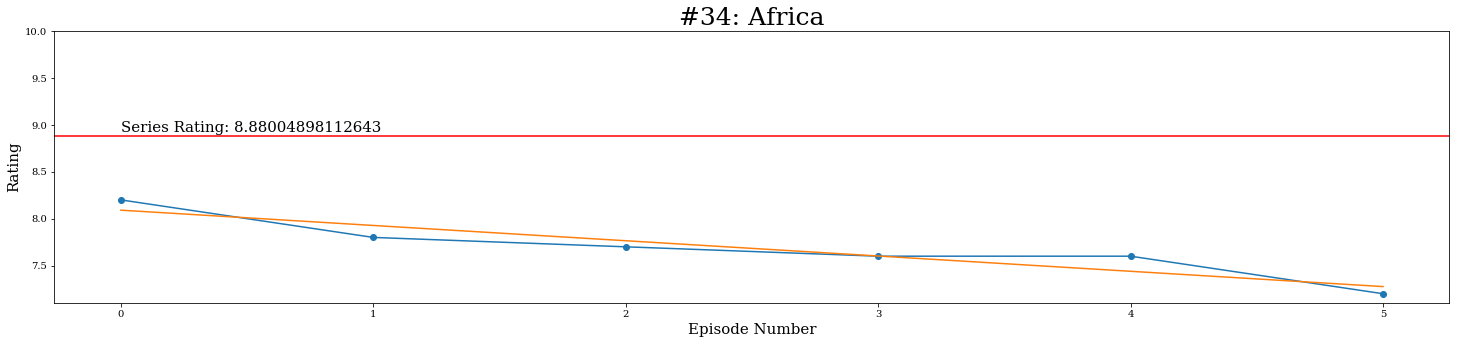

Series rating: 8.88004898112643
Series votes: 8323
Average rating over all seasons: 7.683333333333334
Average votes over all seasons: 283.3333333333333


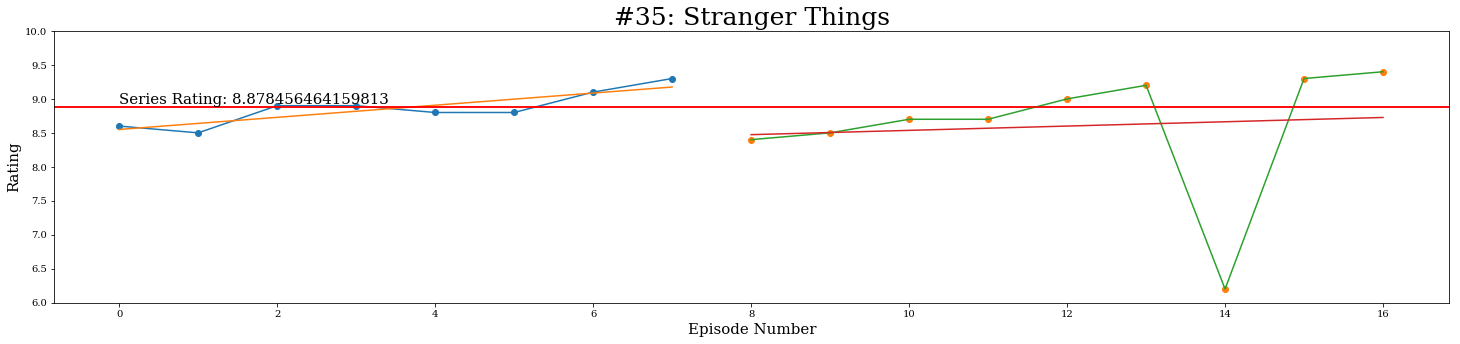

Series rating: 8.878456464159813
Series votes: 468654
Average rating over all seasons: 8.731250000000001
Average votes over all seasons: 10874.895833333332


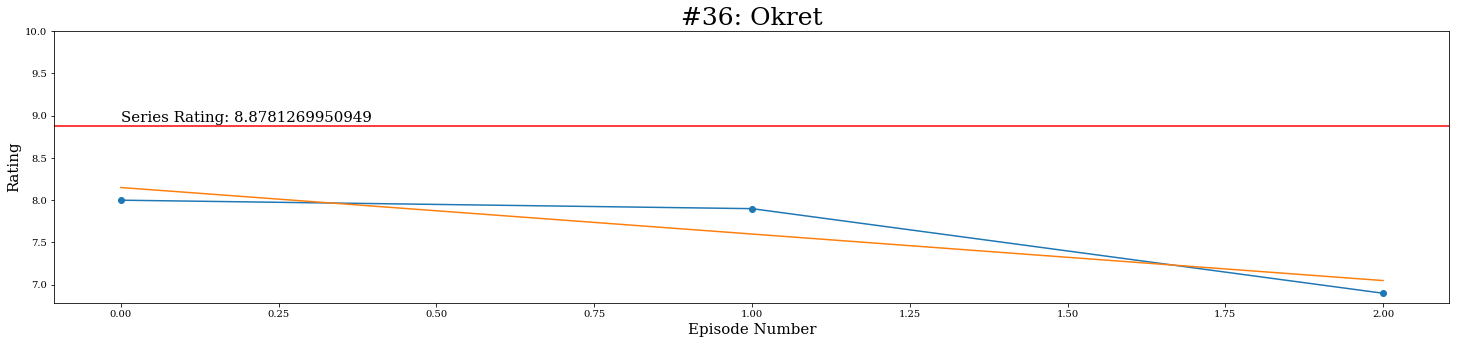

Series rating: 8.8781269950949
Series votes: 17287
Average rating over all seasons: 7.6000000000000005
Average votes over all seasons: 114.66666666666667


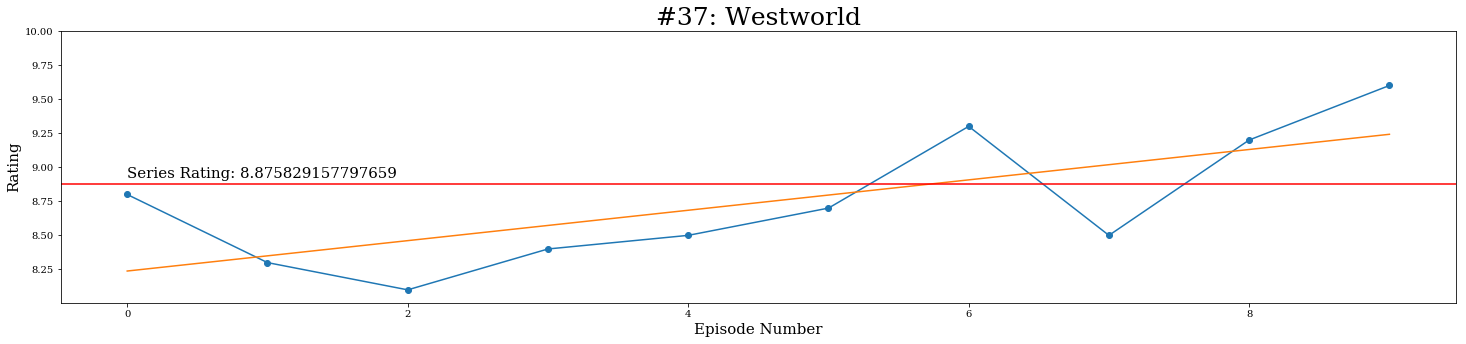

Series rating: 8.875829157797659
Series votes: 263335
Average rating over all seasons: 8.739999999999998
Average votes over all seasons: 11870.5


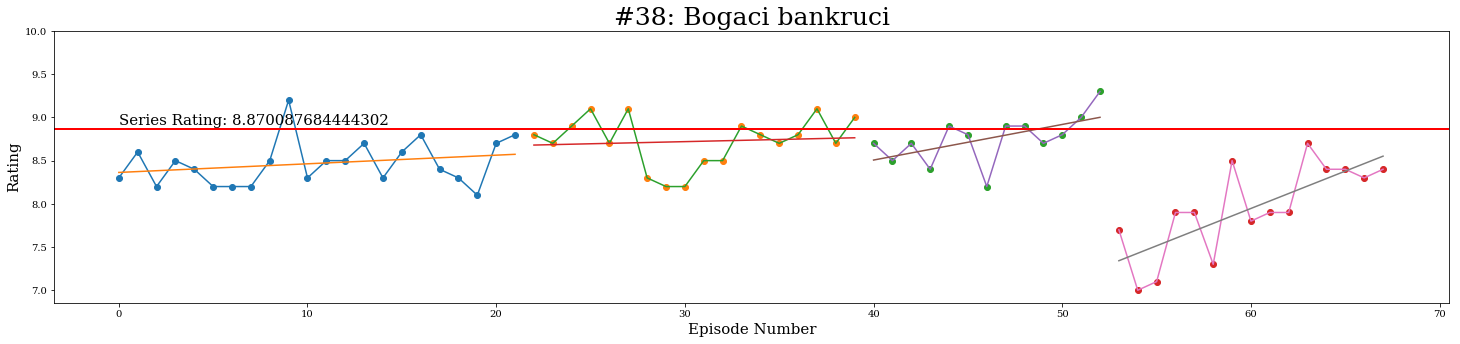

Series rating: 8.870087684444302
Series votes: 237183
Average rating over all seasons: 8.472729215229215
Average votes over all seasons: 1311.633682983683


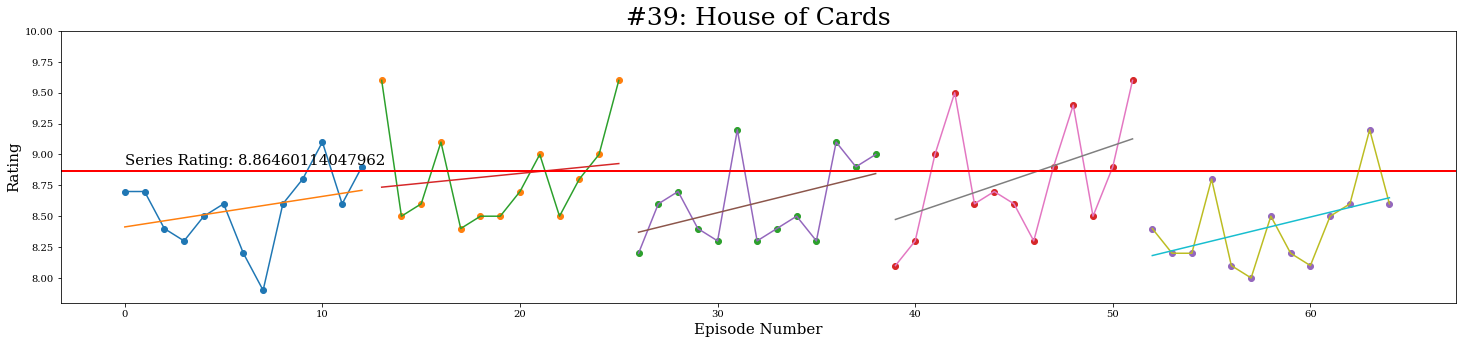

Series rating: 8.86460114047962
Series votes: 396209
Average rating over all seasons: 8.643076923076922
Average votes over all seasons: 3160.5076923076927


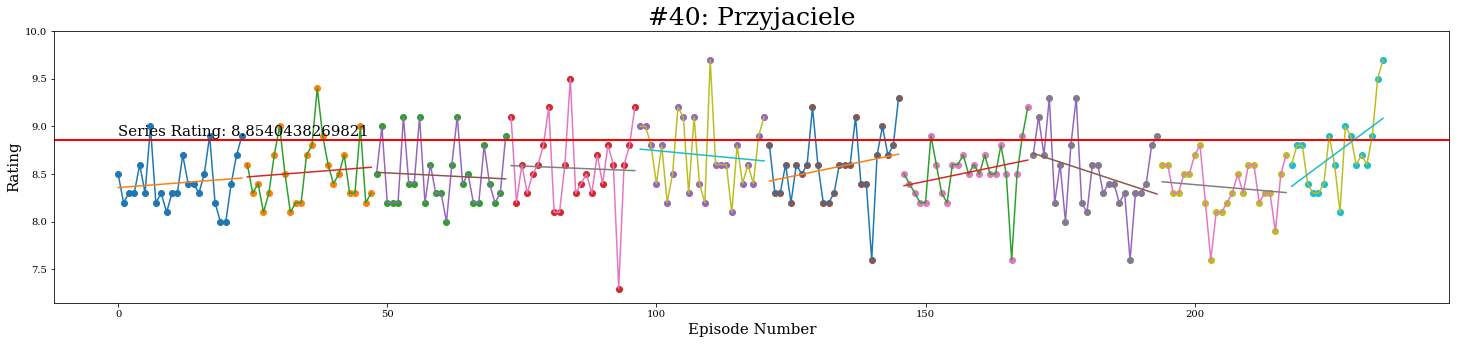

Series rating: 8.8540438269821
Series votes: 584682
Average rating over all seasons: 8.53506111111111
Average votes over all seasons: 2325.6305555555555


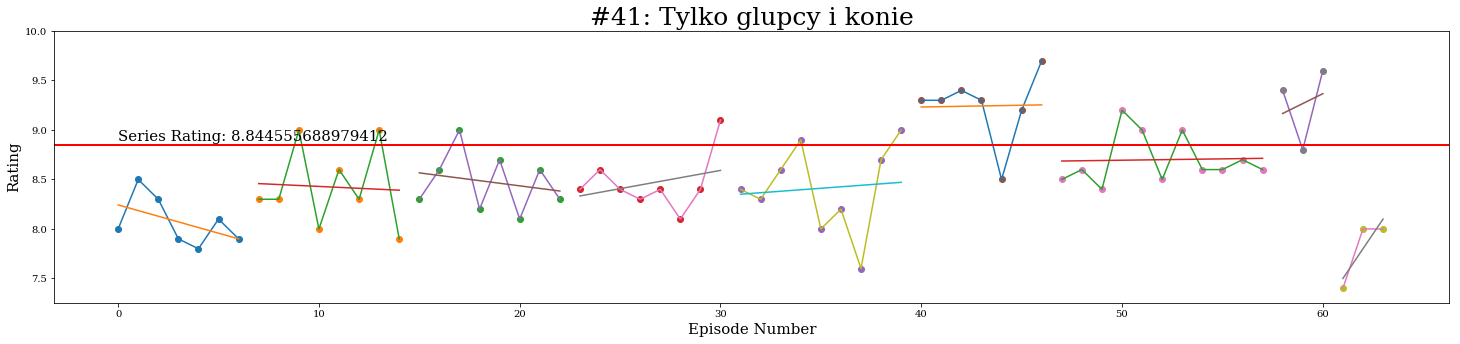

Series rating: 8.844555688979412
Series votes: 36860
Average rating over all seasons: 8.53939594356261
Average votes over all seasons: 275.20614878948214


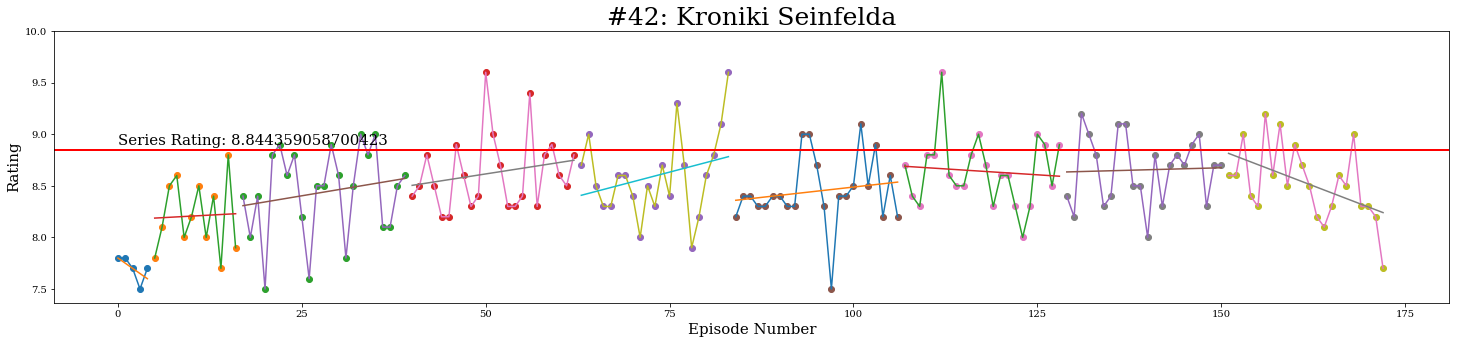

Series rating: 8.844359058700423
Series votes: 202886
Average rating over all seasons: 8.42659357550662
Average votes over all seasons: 1404.1345651128258


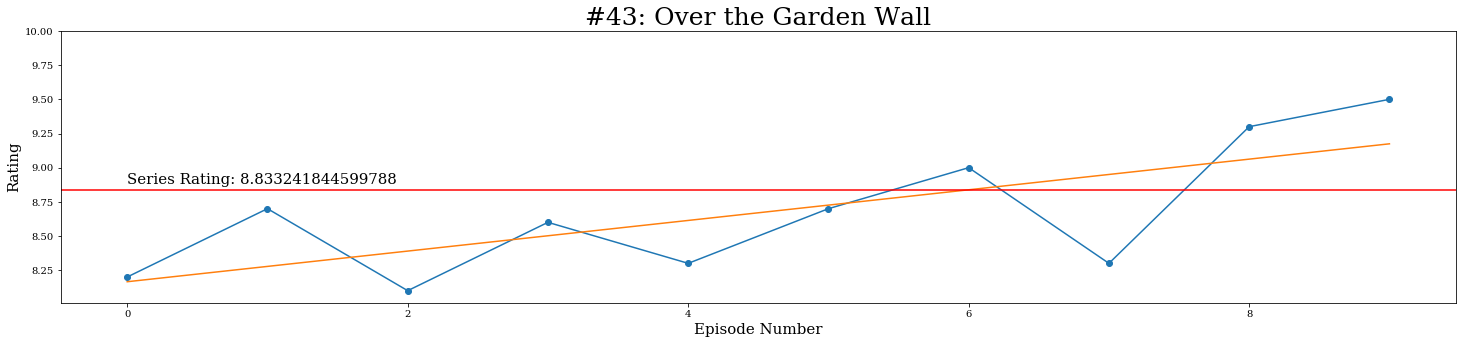

Series rating: 8.833241844599788
Series votes: 19905
Average rating over all seasons: 8.67
Average votes over all seasons: 512.0


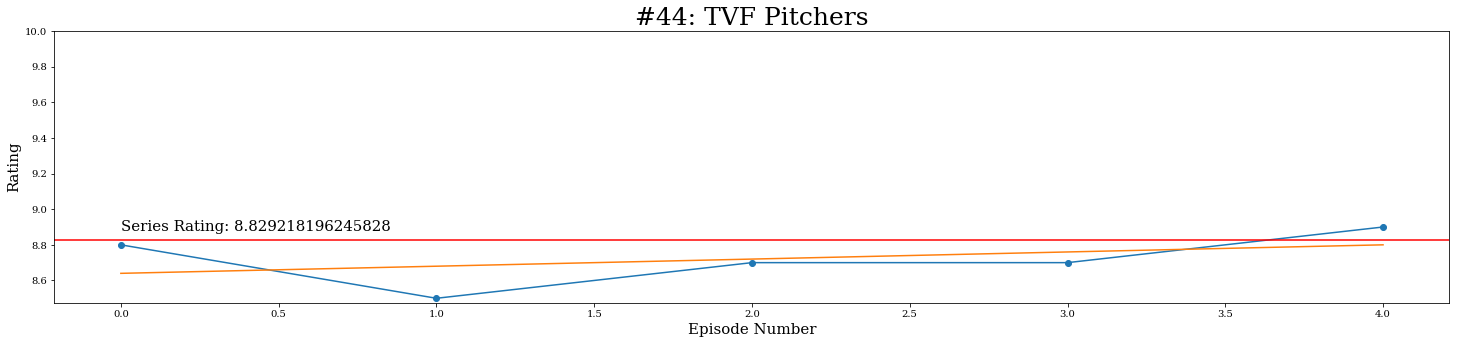

Series rating: 8.829218196245828
Series votes: 39747
Average rating over all seasons: 8.72
Average votes over all seasons: 717.6


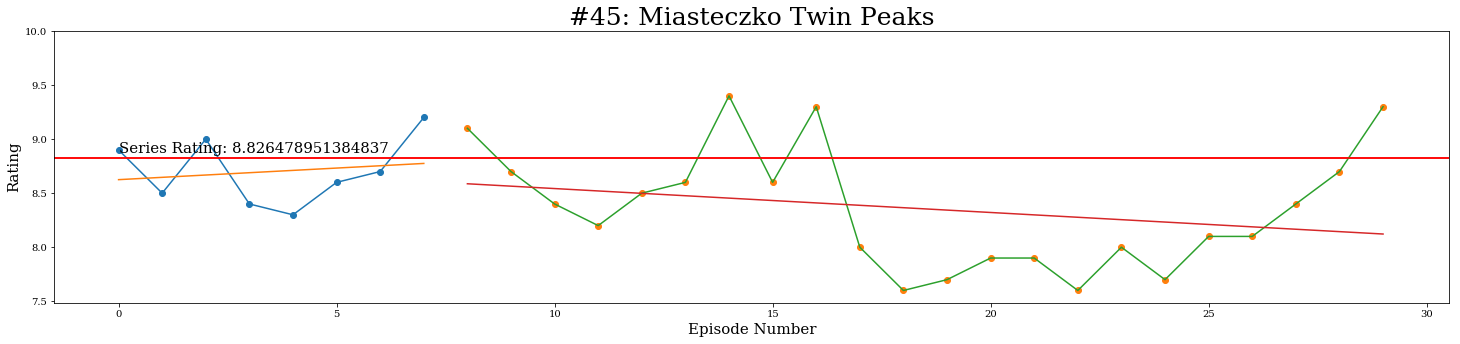

Series rating: 8.826478951384837
Series votes: 140226
Average rating over all seasons: 8.527272727272727
Average votes over all seasons: 3107.1875


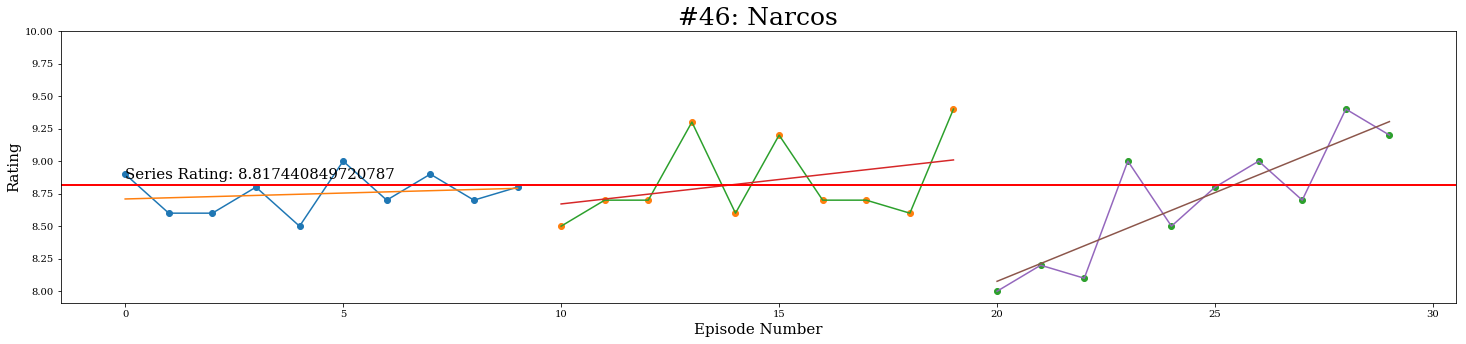

Series rating: 8.817440849720787
Series votes: 242933
Average rating over all seasons: 8.760000000000002
Average votes over all seasons: 2795.5333333333333


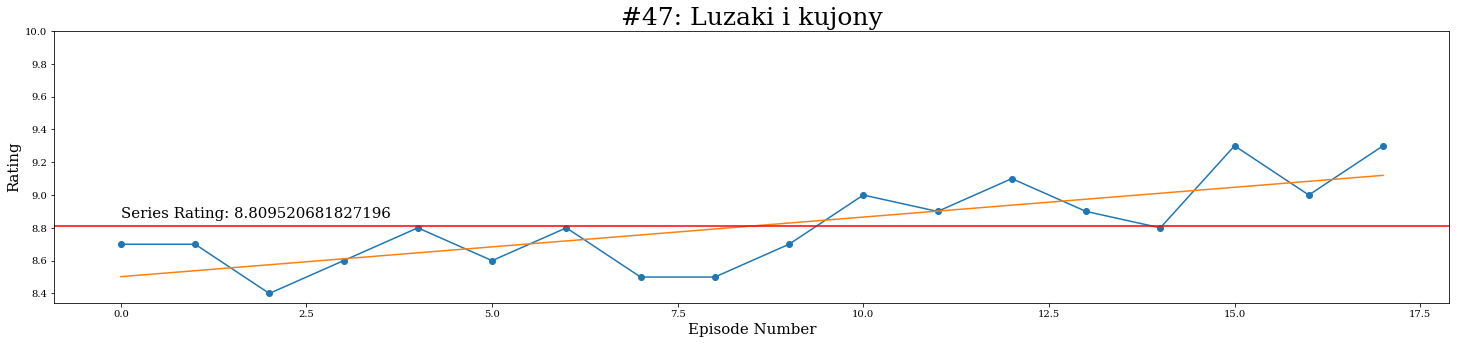

Series rating: 8.809520681827196
Series votes: 110118
Average rating over all seasons: 8.811111111111114
Average votes over all seasons: 1152.5555555555557


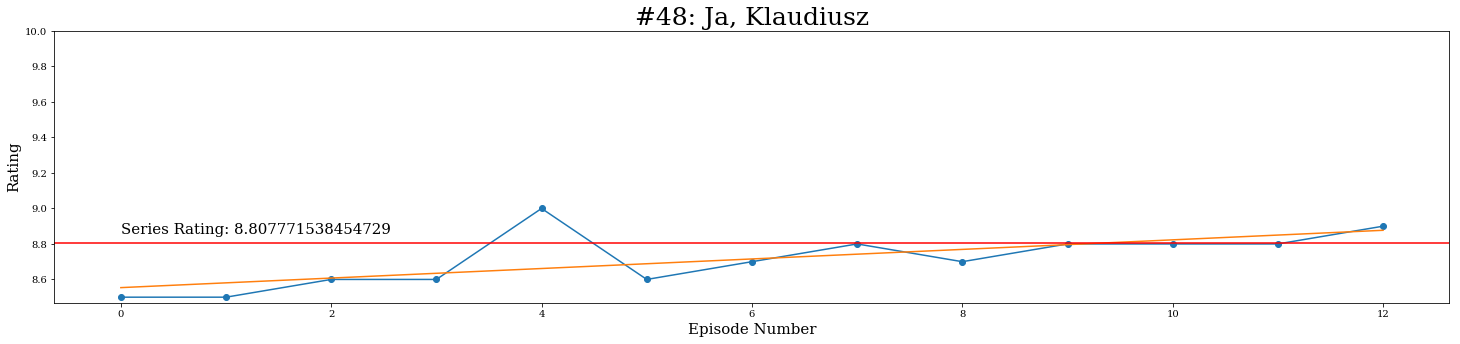

Series rating: 8.807771538454729
Series votes: 12944
Average rating over all seasons: 8.715384615384615
Average votes over all seasons: 151.46153846153845


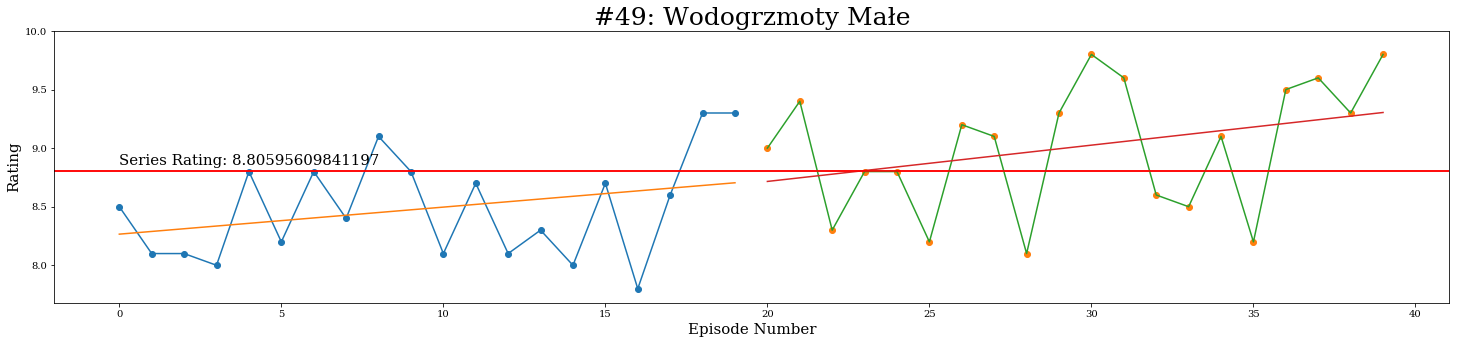

Series rating: 8.80595609841197
Series votes: 40093
Average rating over all seasons: 8.7475
Average votes over all seasons: 929.25


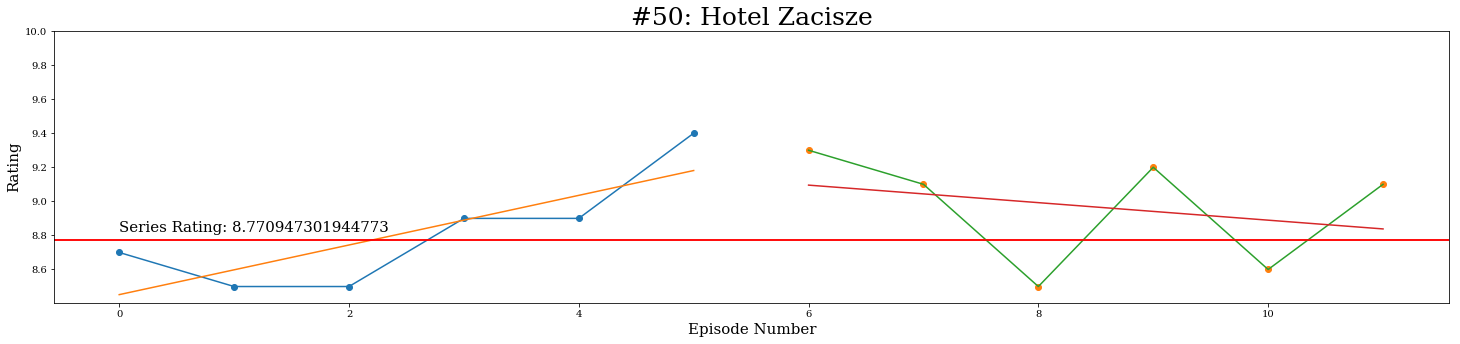

Series rating: 8.770947301944773
Series votes: 69659
Average rating over all seasons: 8.891666666666666
Average votes over all seasons: 1172.75


In [9]:
for num in range(50): #range(len(series_df)):

    series_list = []
    stop_flag = True
    for i in range(500):
        #Get the IMDB page:
        season = "http://www.imdb.com/title/"+str(series_id[num])+"/episodes?season="+str(i+1)
        req = urllib.request.Request(season, headers={'User-Agent' : "Magic Browser"}) 
        con = urllib.request.urlopen( req )
        html = con.read()
        if 'Season '+str(i+2) not in html.decode('utf-8'):
            stop_flag = False
        temp = html.split(b'<h1 class="header">Episode List</h1>')[1]
        table=temp.split(b'\n')

        series_dict = {}
        seas_ep = []
        vote = []
        rate = []
        for i, line in enumerate(table):
            if (line.startswith(b'<div>S')) | (line.startswith(b'</a> <div>S')):
                series_dict['Season'] = re.findall(r'\d+', line.decode('utf-8'))[0]
                seas_ep.append(re.findall(r'\d+', line.decode('utf-8'))[1])  
            elif line.startswith(b'            <span class="ipl-rating-star__total-votes">'):
                vote.append(int(''.join(re.findall(r'\d+', line.decode('utf-8')))))
                rate.append(float(re.findall(r'\d+\.?\d*', table[i-1].decode('utf-8'))[0]))

        if len(seas_ep)!=len(rate):
            seas_ep = seas_ep[:len(rate)]
        
        if rate != []:
            series_dict['Episodes'] = seas_ep
            series_dict['Votes'] = vote
            series_dict['Ratings'] = rate
            series_dict
            series_list.append(series_dict)
        if stop_flag == False:
            break

    season_avg_rate = []
    season_avg_votes = []
    count = 0
    plt.figure(figsize=(25, 5))
    for i in series_list:
        plt.plot(range(count, count+len(i['Episodes'])), i['Ratings'])
        plt.scatter(range(count, count+len(i['Episodes'])), i['Ratings'])
        plt.plot(range(count, count+len(i['Episodes'])), np.poly1d(np.polyfit(range(count, count+len(i['Episodes'])), i['Ratings'], 1))(range(count, count+len(i['Episodes']))))
        plt.axhline(y=float(series_df.loc[num, 'rating']), color='r', linestyle='-')
        season_avg_rate.append(sum(i['Ratings'])/len(i['Ratings']))
        season_avg_votes.append(sum(i['Votes'])/len(i['Votes']))
        count+=len(i['Episodes'])
    plt.title('#'+str(num+1)+': '+series_df.loc[num, 'Title'], fontsize=25)
    plt.xlabel('Episode Number', fontsize=15)
    plt.ylabel('Rating', fontsize=15)
    plt.text(0, 0.05+float(series_df.loc[num, 'rating']), 'Series Rating: '+series_df.loc[num, 'rating'], fontsize=15)
    plt.ylim(ymax=10)
    plt.show()
    print('Series rating: {}'.format(series_df.loc[num, 'rating']))
    print('Series votes: {}'.format(series_df.loc[num, 'votes']))
    print('Average rating over all seasons: {}'.format(sum(season_avg_rate)/len(season_avg_rate)))
    print('Average votes over all seasons: {}'.format(sum(season_avg_votes)/len(season_avg_votes)))        